In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from load_mnist import load_mnist
import numpy as np
from utils import train_neural_network
np.random.seed(0)

# Assignment 1.1

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## Data ingestion

In [3]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

## Training and evaluating network

In [4]:
# Hyperparameters
input_size = 784  # 28x28 images
hidden_size_1 = 256
hidden_size_2 = 128
num_classes = 10
num_epochs = 10
batch_size = 512
learning_rate = 0.001

In [5]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size: int, hidden_size_1: int, hidden_size_2: int, num_classes: int):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, num_classes)
        np.random.seed(0)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
# Initialize the model
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch 1/10, Step 100/118, Loss: 2.3064
Epoch 1/10, Train Loss: 2.3064, Train Accuracy: 11.07%, Test Loss: 2.3048, Test Accuracy: 11.80%
Epoch 2/10, Step 100/118, Loss: 2.3021
Epoch 2/10, Train Loss: 2.3028, Train Accuracy: 12.28%, Test Loss: 2.3011, Test Accuracy: 13.10%
Epoch 3/10, Step 100/118, Loss: 2.2959
Epoch 3/10, Train Loss: 2.2993, Train Accuracy: 13.40%, Test Loss: 2.2974, Test Accuracy: 14.28%
Epoch 4/10, Step 100/118, Loss: 2.2913
Epoch 4/10, Train Loss: 2.2956, Train Accuracy: 14.52%, Test Loss: 2.2936, Test Accuracy: 15.24%
Epoch 5/10, Step 100/118, Loss: 2.2847
Epoch 5/10, Train Loss: 2.2919, Train Accuracy: 15.51%, Test Loss: 2.2898, Test Accuracy: 16.17%
Epoch 6/10, Step 100/118, Loss: 2.2877
Epoch 6/10, Train Loss: 2.2882, Train Accuracy: 16.35%, Test Loss: 2.2859, Test Accuracy: 17.14%
Epoch 7/10, Step 100/118, Loss: 2.2816
Epoch 7/10, Train Loss: 2.2843, Train Accuracy: 17.22%, Test Loss: 2.2819, Test Accuracy: 18.04%
Epoch 8/10, Step 100/118, Loss: 2.2762
Epoch 8/1

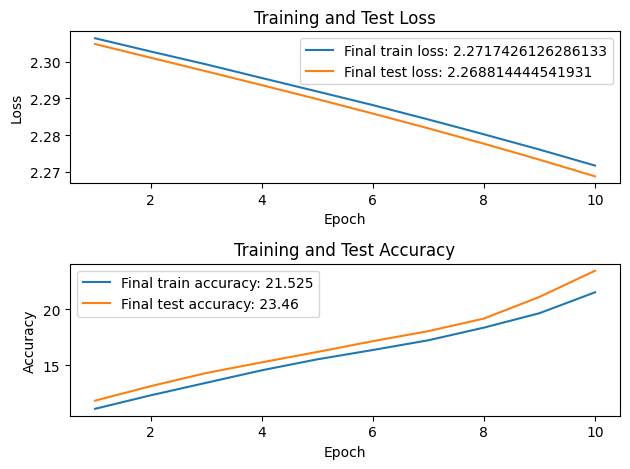

In [9]:
train_neural_network(model, criterion, optimizer, train_loader, test_loader, num_epochs, device)